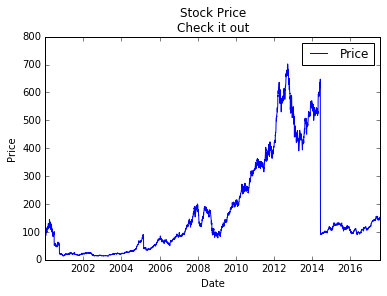

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
import pprint

#converting the datestamps from the Yahoo finance API to times that Matplotlib understands
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)

    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)

    return bytesconverter


def graph_data():
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[2:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    # pprint.pprint(stock_data)
    date, openp, highp, lowp, closep, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      # %Y = full year. 2015
                                                                      # %y = partial year 15
                                                                      # %m = number month
                                                                      # %d = number day
                                                                      # %H = hours
                                                                      # %M = minutes
                                                                      # %S = seconds
                                                                      # 12-06-2014
                                                                      # %m-%d-%Y
                                                                      converters={0: bytespdate2num('%Y-%m-%d')})

    # print("date", date)

    plt.plot_date(date, closep, '-', label='Price')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Price\nCheck it out')
    plt.legend()
    plt.show()


graph_data()